In [1]:
import pandas as pd
import numpy as np
import time
import joblib

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
x = joblib.load('essay_ease10_sbert768_simbow_langerr_780_normalized_asap6')
y = joblib.load('score_asap6')

### Plot the data using t-sne

In [3]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000)
tsne_results = tsne.fit_transform(x)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

import pandas as pd
data = pd.DataFrame()
data['tsne-2d-one'] = tsne_results[:,0]
data['tsne-2d-two'] = tsne_results[:,1]
data['y'] = y
data

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1800 samples in 0.109s...
[t-SNE] Computed neighbors for 1800 samples in 0.855s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1800
[t-SNE] Computed conditional probabilities for sample 1800 / 1800
[t-SNE] Mean sigma: 8.432028
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.092129
[t-SNE] KL divergence after 1000 iterations: 0.373161
t-SNE done! Time elapsed: 13.382071733474731 seconds


,tsne-2d-one,tsne-2d-two,y
0,31.072620,-13.955011,2
1,-14.428738,22.634365,3
2,7.721159,35.535046,4
3,-17.941170,16.890287,1
4,13.228493,32.580257,3
...,...,...,...
1795,25.174206,26.022022,0
1796,-4.757580,-24.549856,2
1797,22.311852,-28.654333,3
1798,-6.245740,-24.525824,2


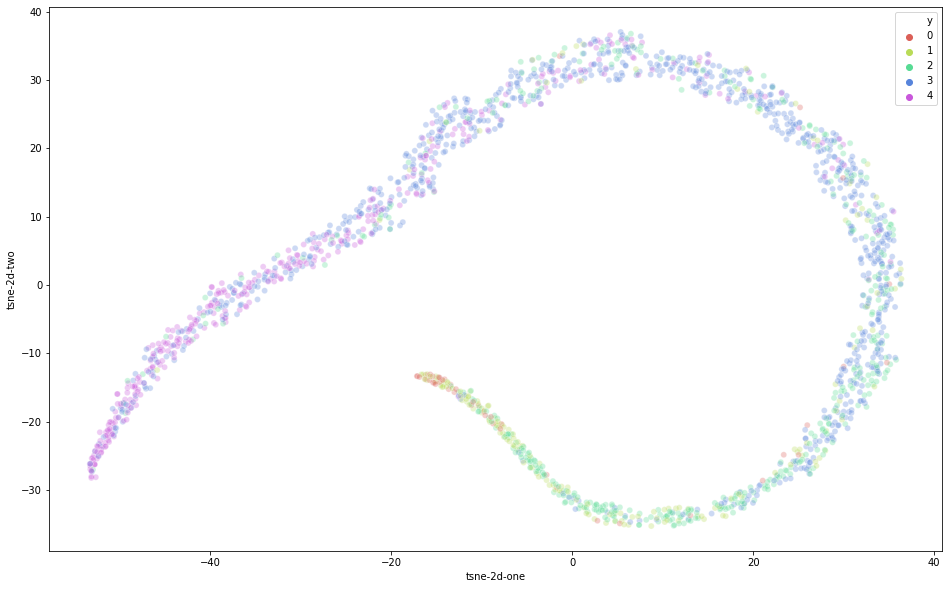

In [4]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue='y',
    palette=sns.color_palette("hls", 5),
    data=data,
    legend="full",
    alpha=0.3
)

### Plot the data using PCA

In [3]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x)

data['pca-one'] = pca_result[:,0]
data['pca-two'] = pca_result[:,1]
data

NameError: name 'data' is not defined

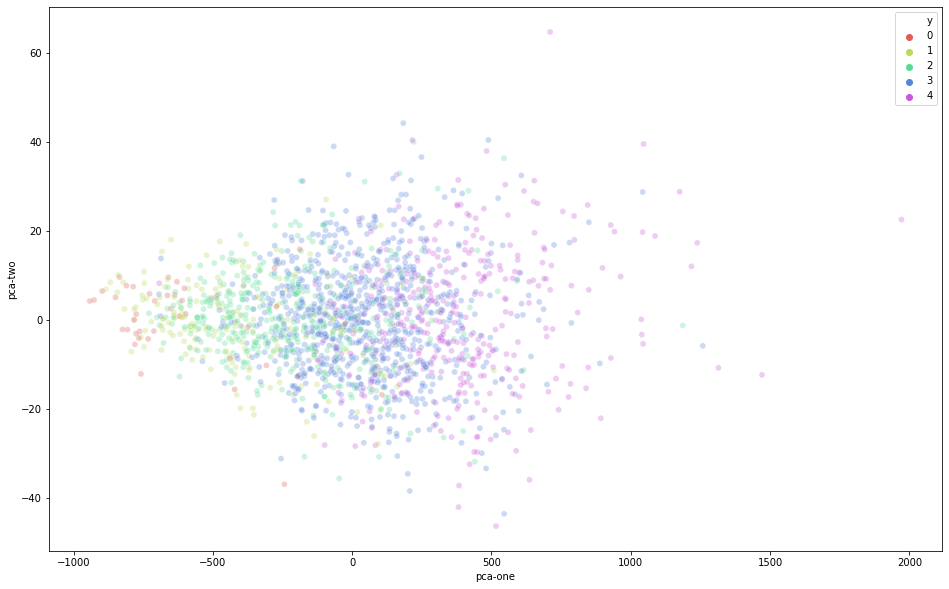

In [11]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue='y',
    palette=sns.color_palette("hls", 5),
    data=data,
    legend="full",
    alpha=0.3
)

## Plot PCA and T-SNE

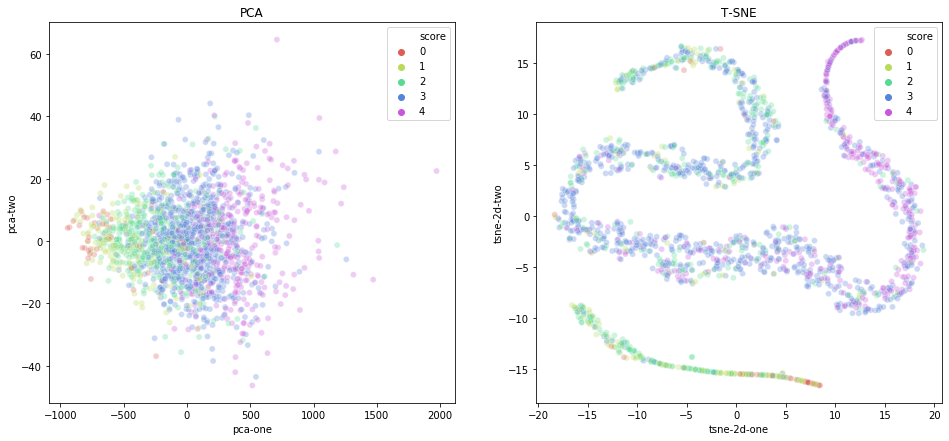

In [45]:
data['score'] = y

plt.figure(figsize=(16,7))

ax1 = plt.subplot(1, 2, 1)
ax1.set_title('PCA')
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="score",
    palette=sns.color_palette("hls", 5),
    data=data,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 2, 2)
ax2.set_title('T-SNE')
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="score",
    palette=sns.color_palette("hls", 5),
    data=data,
    legend="full",
    alpha=0.3,
    ax=ax2
)

plt.savefig('pca_tsne.png', bbox_inches="tight")

## Only plot 12 interpretable features

In [4]:
x_12 = x[:, 12:]
x_12.shape

(1800, 768)

In [5]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=5000)
tsne_results_12 = tsne.fit_transform(x_12)

pca = PCA(n_components=2)
pca_result_12 = pca.fit_transform(x_12)

data_12 = pd.DataFrame()
data_12['tsne-2d-one'] = tsne_results_12[:,0]
data_12['tsne-2d-two'] = tsne_results_12[:,1]
data_12['pca-one'] = pca_result_12[:,0]
data_12['pca-two'] = pca_result_12[:,1]
data_12['score'] = y

data_12

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1800 samples in 0.078s...
[t-SNE] Computed neighbors for 1800 samples in 4.517s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1800
[t-SNE] Computed conditional probabilities for sample 1800 / 1800
[t-SNE] Mean sigma: 1.335561
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.009811
[t-SNE] KL divergence after 5000 iterations: 2.045926


,tsne-2d-one,tsne-2d-two,pca-one,pca-two,score
0,2.056573,-17.638384,-2.423388,-1.014491,2
1,-1.646973,2.162241,0.551171,0.382408,3
2,1.162318,-3.958978,-1.085967,-0.538798,4
3,-17.186214,18.277777,3.233435,-0.510848,1
4,11.896442,-6.908183,-1.137577,0.345697,3
...,...,...,...,...,...
1795,-6.163552,15.819291,0.593060,0.637959,0
1796,-9.078267,-26.767769,-1.617612,1.169363,2
1797,5.340797,-19.060200,-2.209875,-0.649783,3
1798,5.173103,-28.107059,-4.999932,-3.395696,2


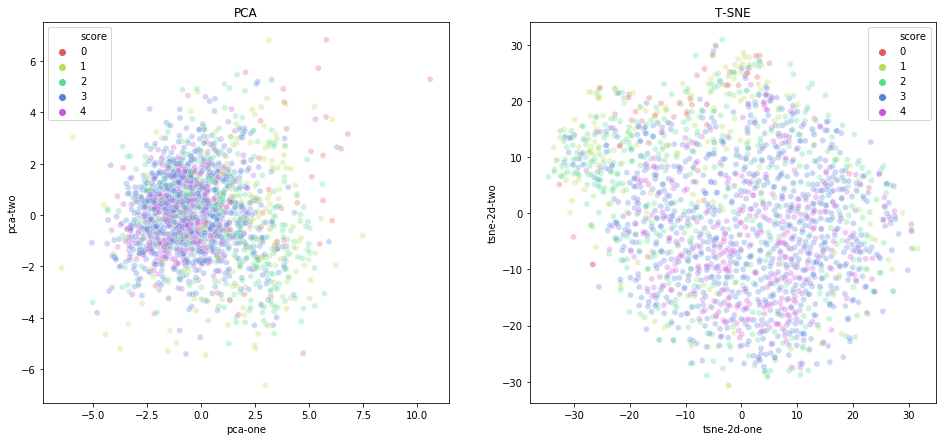

In [6]:
plt.figure(figsize=(16,7))

ax1 = plt.subplot(1, 2, 1)
ax1.set_title('PCA')
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="score",
    palette=sns.color_palette("hls", 5),
    data=data_12,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 2, 2)
ax2.set_title('T-SNE')
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="score",
    palette=sns.color_palette("hls", 5),
    data=data_12,
    legend="full",
    alpha=0.3,
    ax=ax2
)

plt.savefig('pca_tsne.png', bbox_inches="tight")

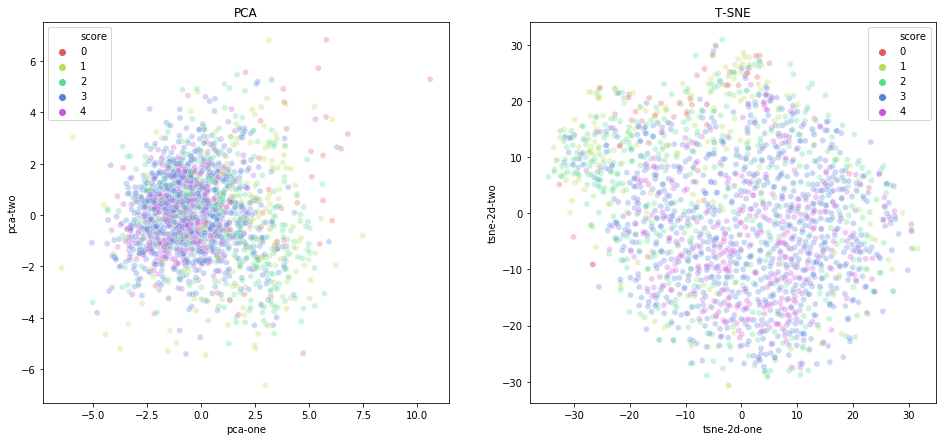

In [7]:
plt.figure(figsize=(16,7))

ax1 = plt.subplot(1, 2, 1)
ax1.set_title('PCA')
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="score",
    palette=sns.color_palette("hls", 5),
    data=data_12,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 2, 2)
ax2.set_title('T-SNE')
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="score",
    palette=sns.color_palette("hls", 5),
    data=data_12,
    legend="full",
    alpha=0.3,
    ax=ax2
)

plt.savefig('pca_tsne.png', bbox_inches="tight")

### 3 dimensions PCA

In [74]:
#pca = PCA(n_components=3)
#result = pca.fit_transform(x_12)

tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=5000)
result = tsne.fit_transform(x_12)

xa = result[:,0]
xb = result[:,1] 
xc = result[:,2]

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1800 samples in 0.000s...
[t-SNE] Computed neighbors for 1800 samples in 0.064s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1800
[t-SNE] Computed conditional probabilities for sample 1800 / 1800
[t-SNE] Mean sigma: 8.874955
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.746582
[t-SNE] KL divergence after 5000 iterations: 0.307037


No handles with labels found to put in legend.


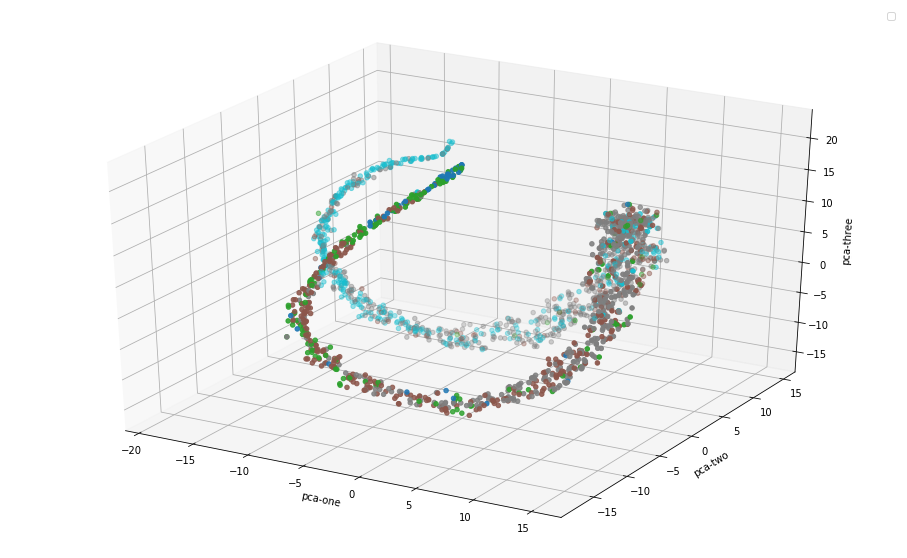

In [78]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=xa, 
    ys=xb, 
    zs=xc, 
    c=y, 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
ax.legend()
plt.show()